In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('household_data_60min_singleindex_filtered (2).csv')

data

,utc_timestamp,cet_cest_timestamp,interpolated,DE_KN_residential3_circulation_pump,DE_KN_residential3_dishwasher,DE_KN_residential3_freezer,DE_KN_residential3_grid_export,DE_KN_residential3_grid_import,DE_KN_residential3_pv,DE_KN_residential3_refrigerator,...,DE_KN_residential4_pv,DE_KN_residential4_refrigerator,DE_KN_residential4_washing_machine,DE_KN_residential6_circulation_pump,DE_KN_residential6_dishwasher,DE_KN_residential6_freezer,DE_KN_residential6_grid_export,DE_KN_residential6_grid_import,DE_KN_residential6_pv,DE_KN_residential6_washing_machine
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,NaN,NaN,0.000,0.001567,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,0.06300,0.003,0.024375,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,NaN,0.13200,0.005,0.063975,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,NaN,0.20025,0.008,0.101650,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,NaN,0.26900,0.010,0.105833,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,2019-05-01T18:00:00Z,2019-05-01T20:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38450,2019-05-01T19:00:00Z,2019-05-01T21:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38451,2019-05-01T20:00:00Z,2019-05-01T22:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38452,2019-05-01T21:00:00Z,2019-05-01T23:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
columns_to_remove = [
    'cet_cest_timestamp',
    'interpolated',
    'DE_KN_residential4_dishwasher',
    'DE_KN_residential4_ev',
    'DE_KN_residential4_freezer',
    'DE_KN_residential4_grid_export',
    'DE_KN_residential4_grid_import',
    'DE_KN_residential4_heat_pump',
    'DE_KN_residential4_pv',
    'DE_KN_residential4_refrigerator',
    'DE_KN_residential4_washing_machine',
    'DE_KN_residential6_circulation_pump',
    'DE_KN_residential6_dishwasher',
    'DE_KN_residential6_freezer',
    'DE_KN_residential6_grid_export',
    'DE_KN_residential6_grid_import',
    'DE_KN_residential6_pv',
    'DE_KN_residential6_washing_machine'
]

data = data.drop(columns=columns_to_remove, errors='ignore')


In [4]:
for column in data.columns:
    print(column)

utc_timestamp
DE_KN_residential3_circulation_pump
DE_KN_residential3_dishwasher
DE_KN_residential3_freezer
DE_KN_residential3_grid_export
DE_KN_residential3_grid_import
DE_KN_residential3_pv
DE_KN_residential3_refrigerator
DE_KN_residential3_washing_machine


In [5]:
rename_columns = {
    'DE_KN_residential3_circulation_pump': 'circulation_pump',
    'DE_KN_residential3_dishwasher': 'dishwasher',
    'DE_KN_residential3_freezer': 'freezer',
    'DE_KN_residential3_grid_export': 'grid_export',
    'DE_KN_residential3_grid_import': 'grid_import',
    'DE_KN_residential3_pv': 'pv',
    'DE_KN_residential3_refrigerator': 'refrigerator',
    'DE_KN_residential6_washing_machine': 'washing_machine'
}

data = data.rename(columns=rename_columns)

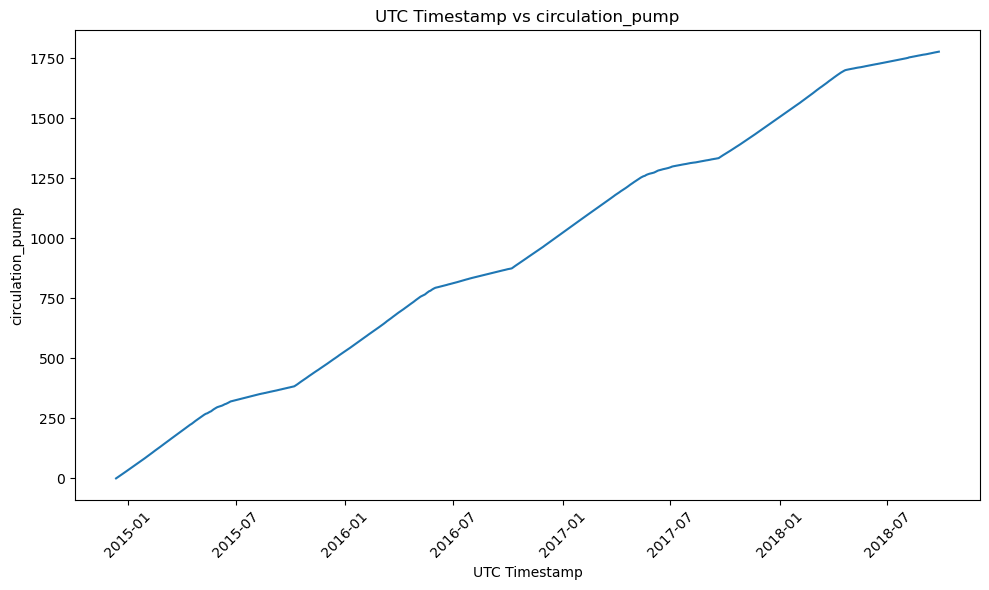

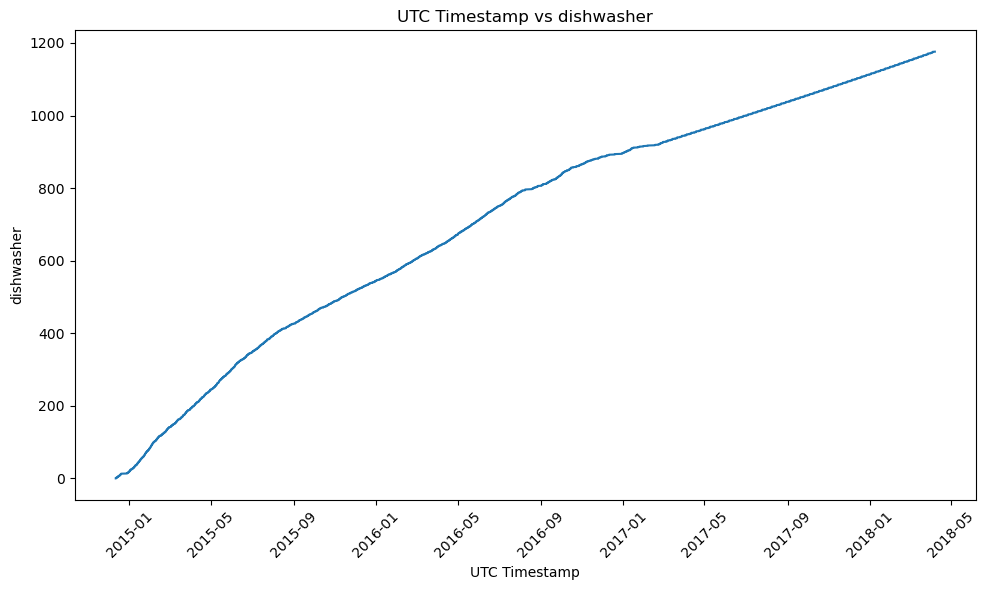

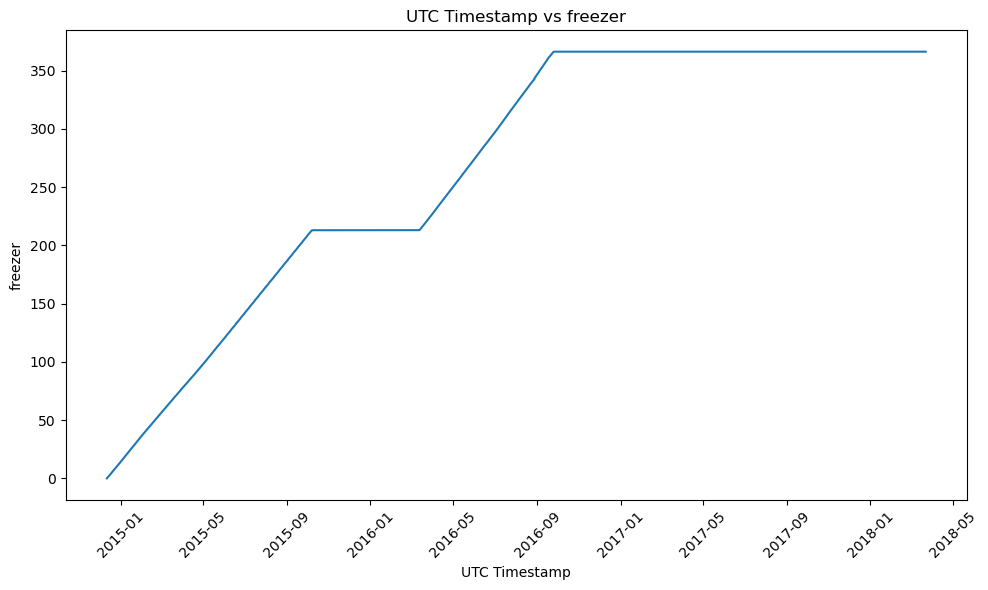

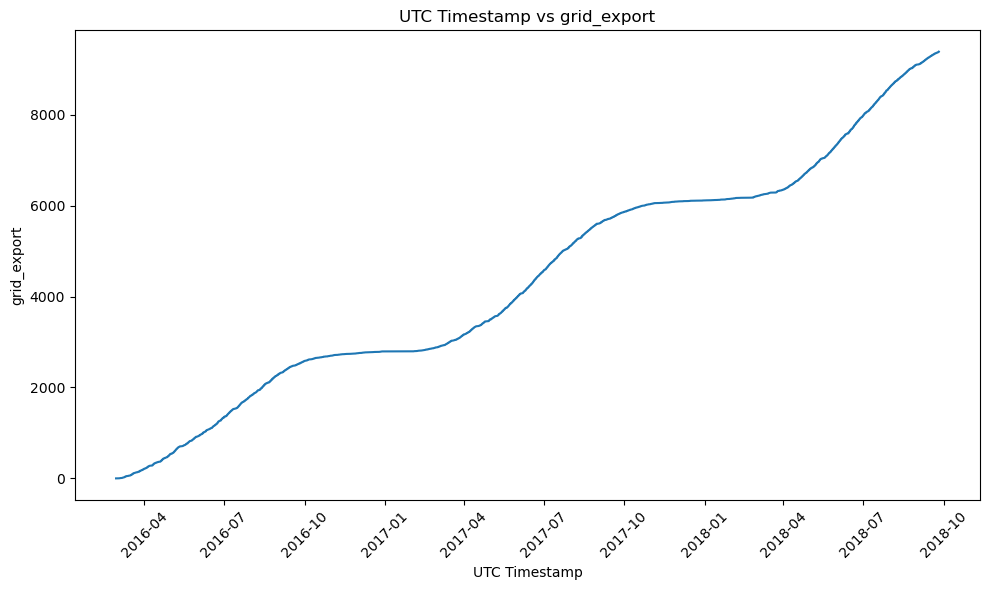

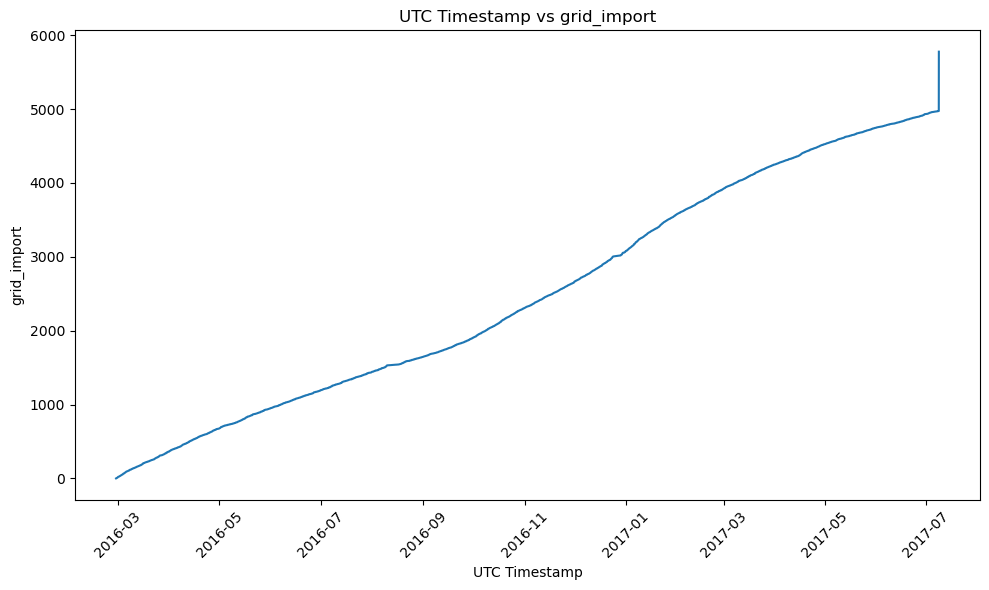

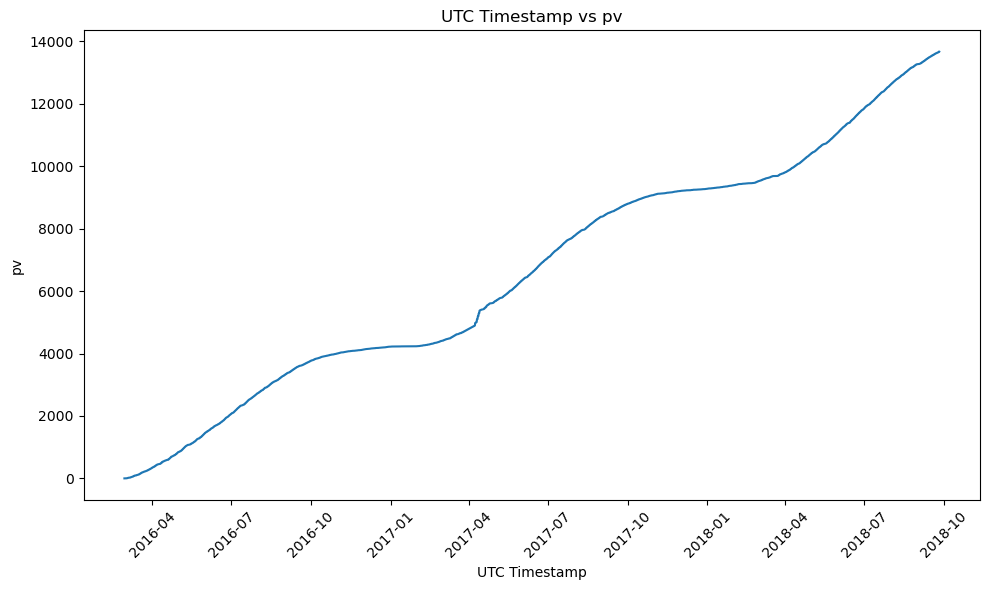

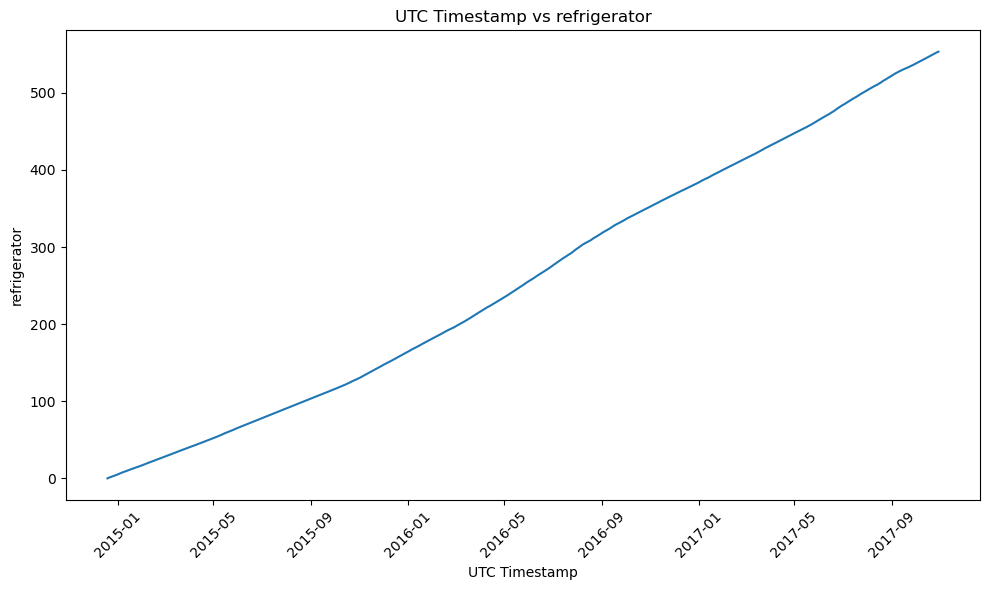

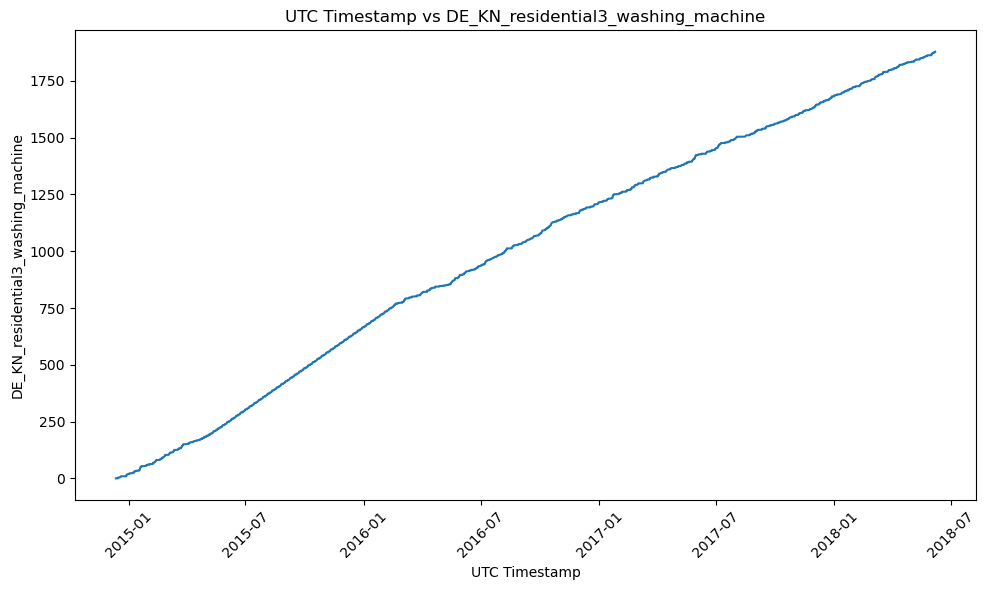

In [12]:
columns_to_plot = [
    'circulation_pump',
    'dishwasher',
    'freezer',
    'grid_export',
    'grid_import',
    'pv',
    'refrigerator',
    'DE_KN_residential3_washing_machine'
]

# Convert 'utc_timestamp' to datetime if it's not already
data['utc_timestamp'] = pd.to_datetime(data['utc_timestamp'])

# Creating plots
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(data['utc_timestamp'], data[column])
    plt.title(f'UTC Timestamp vs {column}')
    plt.xlabel('UTC Timestamp')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [13]:
import numpy as np
cumulative_columns = data.select_dtypes(include=[np.number]).columns

non_cumulative_data = data.copy()
for column in cumulative_columns:
    non_cumulative_data[column] = non_cumulative_data[column].diff().fillna(0)

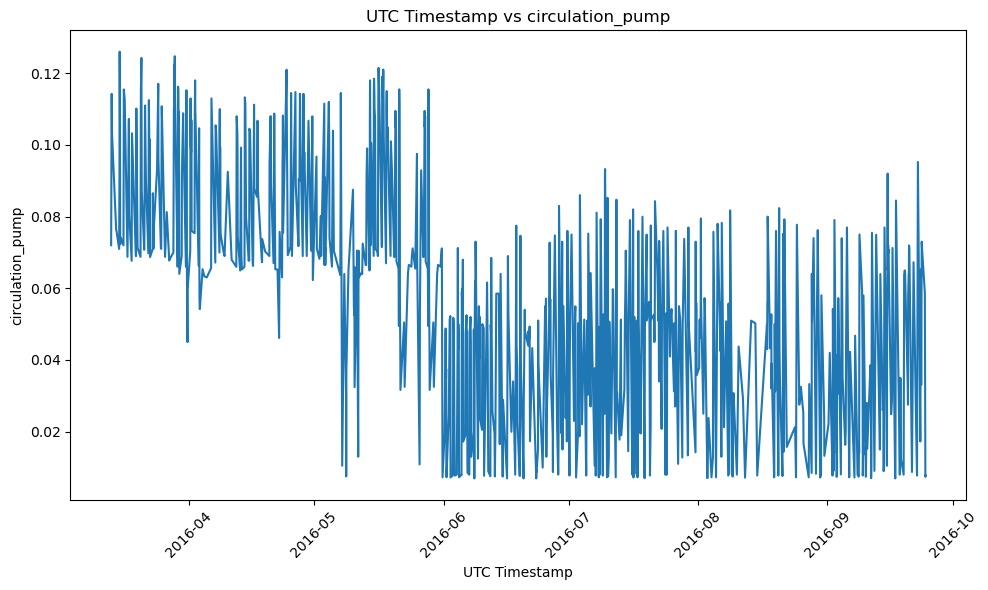

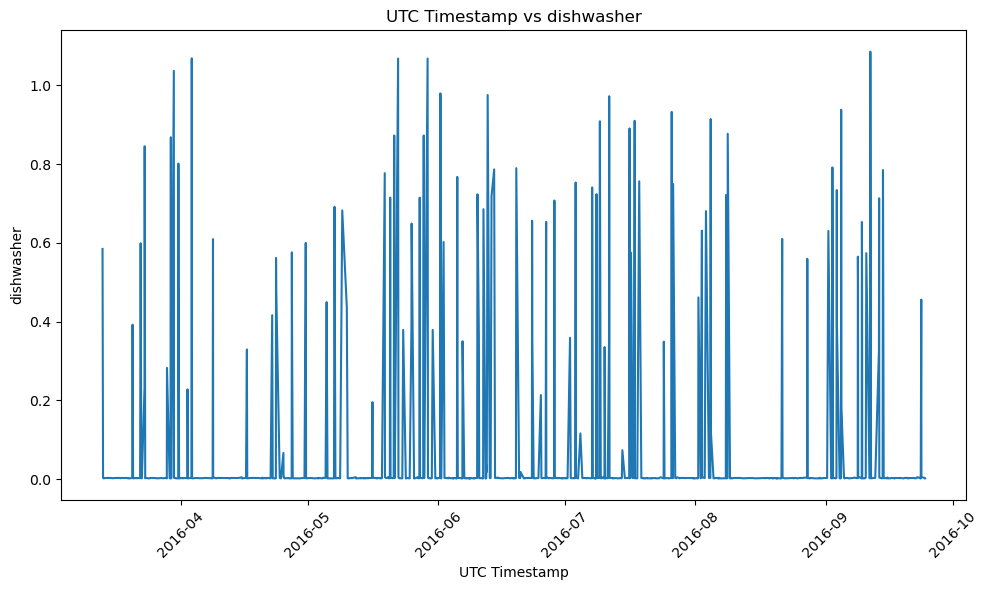

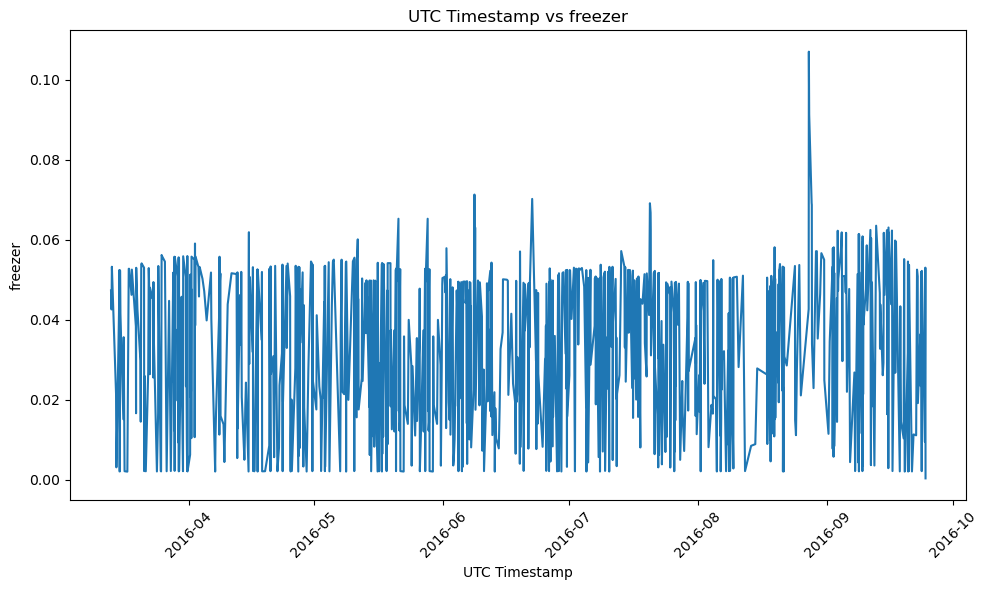

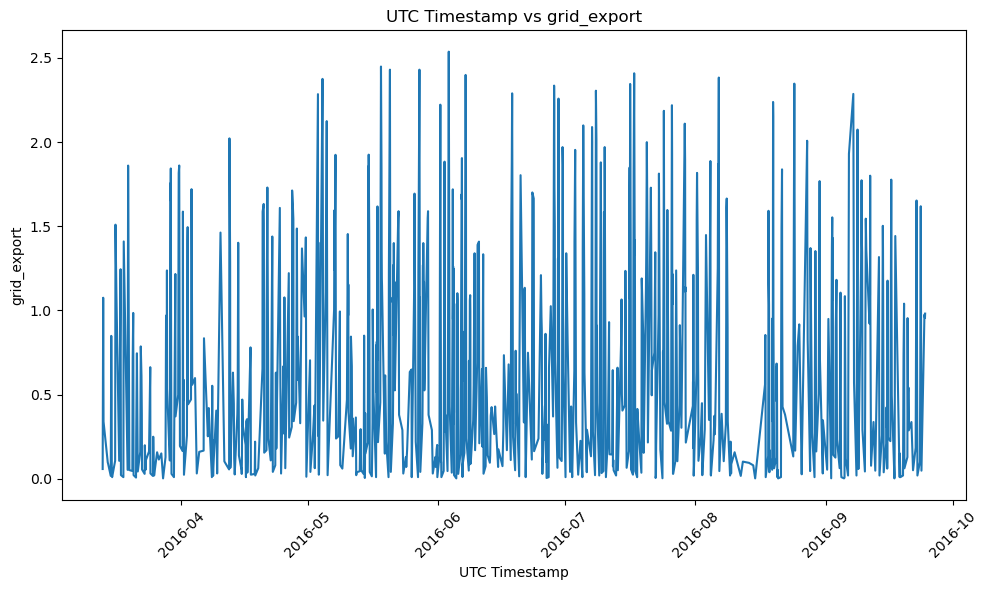

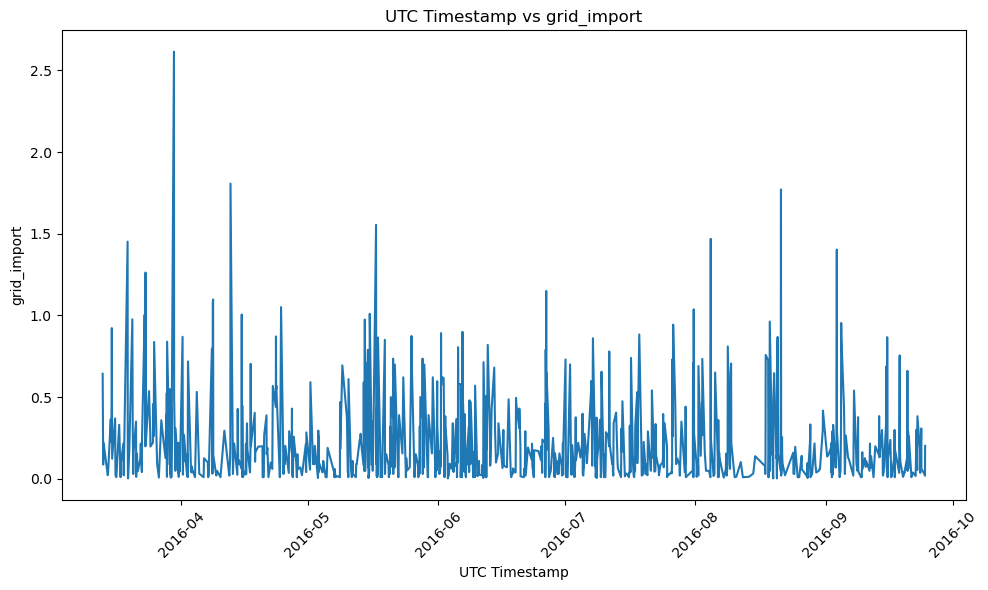

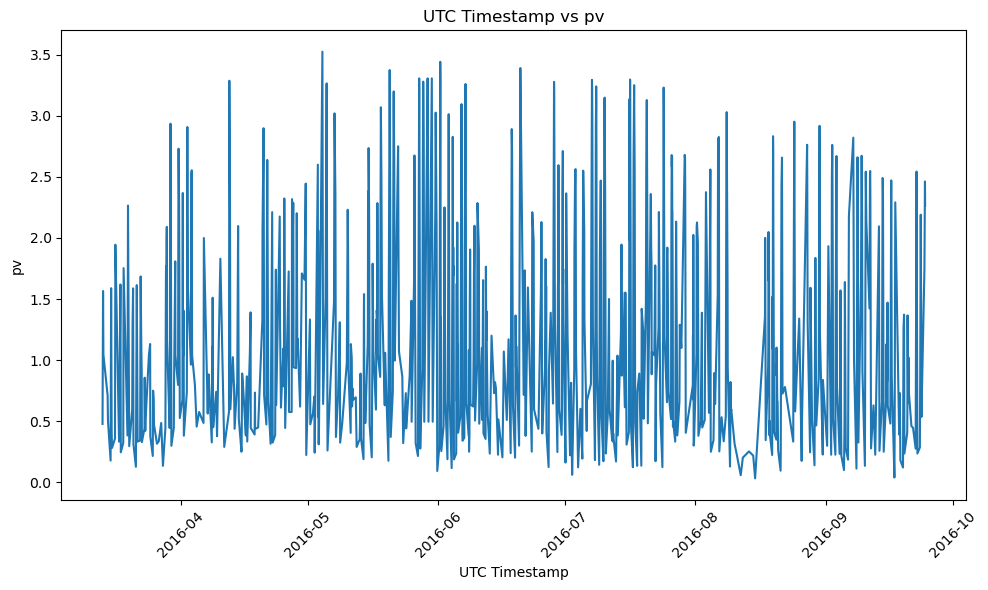

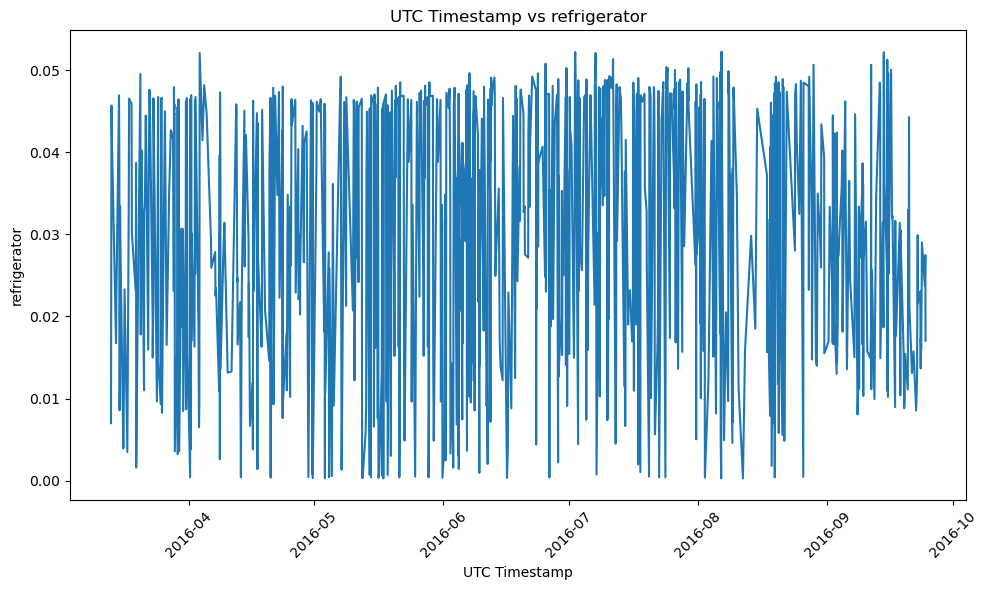

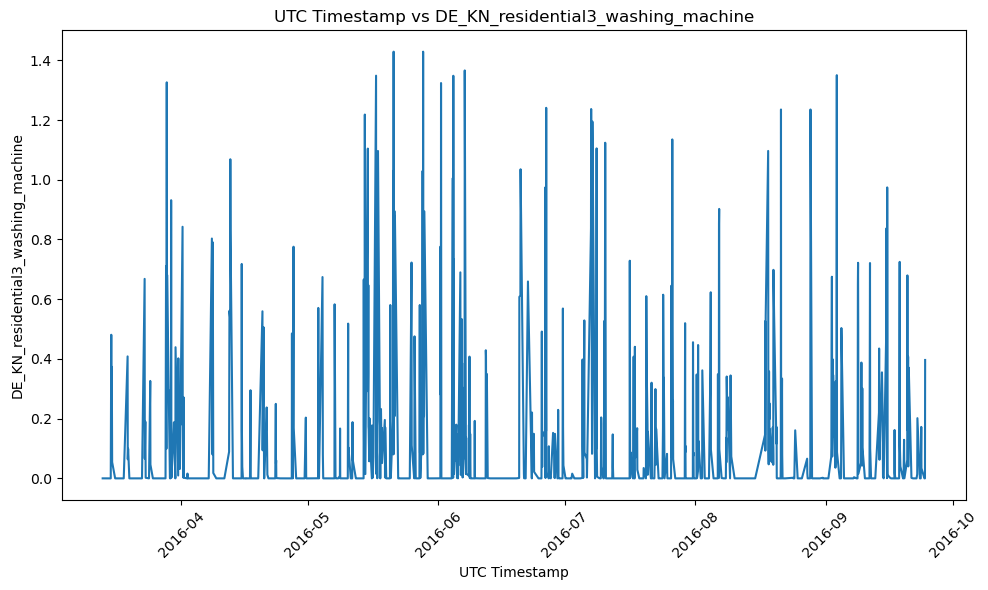

In [16]:
columns_to_plot = [
    'circulation_pump',
    'dishwasher',
    'freezer',
    'grid_export',
    'grid_import',
    'pv',
    'refrigerator',
    'DE_KN_residential3_washing_machine'
]

# Convert 'utc_timestamp' to datetime if it's not already
non_cumulative_data['utc_timestamp'] = pd.to_datetime(non_cumulative_data['utc_timestamp'])
filtered_data = non_cumulative_data[(non_cumulative_data[columns_to_plot] != 0).all(axis=1)]


# Creating plots
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    plt.plot(filtered_data['utc_timestamp'],filtered_data[column])
    plt.title(f'UTC Timestamp vs {column}')
    plt.xlabel('UTC Timestamp')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [21]:
filtered_data.describe()

,circulation_pump,dishwasher,freezer,grid_export,grid_import,pv,refrigerator,DE_KN_residential3_washing_machine
count,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000,892.000000
mean,0.056074,0.074634,0.033076,0.679030,0.211088,1.247600,0.030037,0.151287
std,0.031998,0.208892,0.019238,0.626258,0.269098,0.856779,0.015651,0.272134
min,0.006958,0.001953,0.000366,0.002441,0.002441,0.031738,0.000275,0.000003
25%,0.030499,0.002258,0.015965,0.133789,0.038574,0.509766,0.016314,0.000122
50%,0.055275,0.002991,0.036220,0.479492,0.112549,1.053141,0.031742,0.008295
75%,0.074988,0.003052,0.050229,1.110718,0.270996,1.860596,0.045957,0.170547
max,0.126022,1.085495,0.107067,2.537598,2.614258,3.524414,0.052256,1.428845


C:\Users\kunal\AppData\Local\Temp\ipykernel_12028\3735070130.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(filtered_data.columns, rotation=45, ha="right")


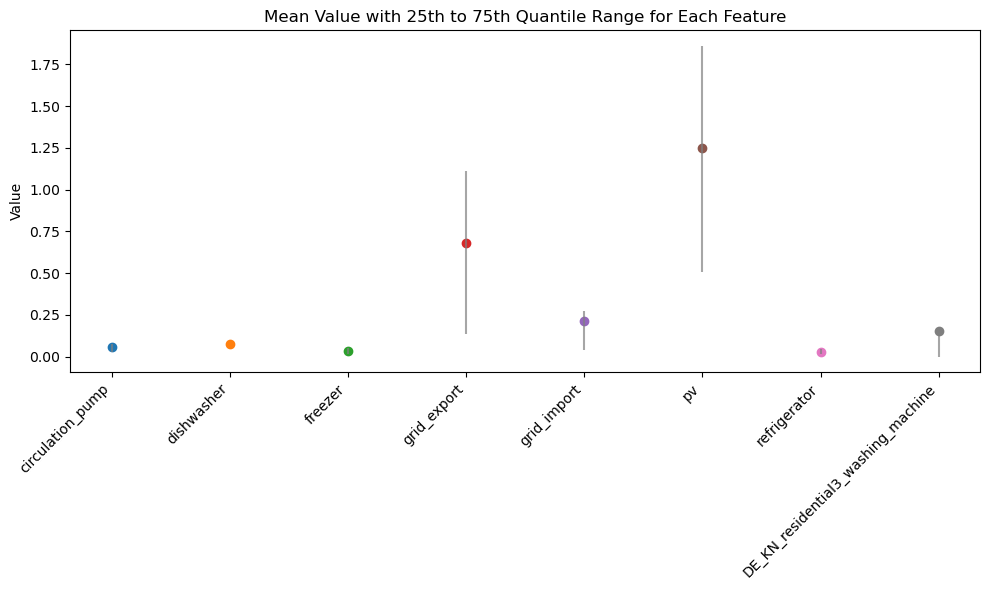

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
excluded_column = 'utc_timestamp'

filtered_data = filtered_data.loc[:, filtered_data.columns != excluded_column]

for column in filtered_data.columns:
    mean_series = filtered_data[column].mean()
    quantile25 = filtered_data[column].quantile(0.25)
    quantile75 = filtered_data[column].quantile(0.75)

    ax.plot([column], [mean_series], 'o', label=f'{column} mean')
    ax.vlines(column, quantile25, quantile75, color='grey', alpha=0.7, label=f'{column} 25th-75th quantile')
    
ax.set_ylabel('Value')
ax.set_xticklabels(filtered_data.columns, rotation=45, ha="right")
ax.set_title('Mean Value with 25th to 75th Quantile Range for Each Feature')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


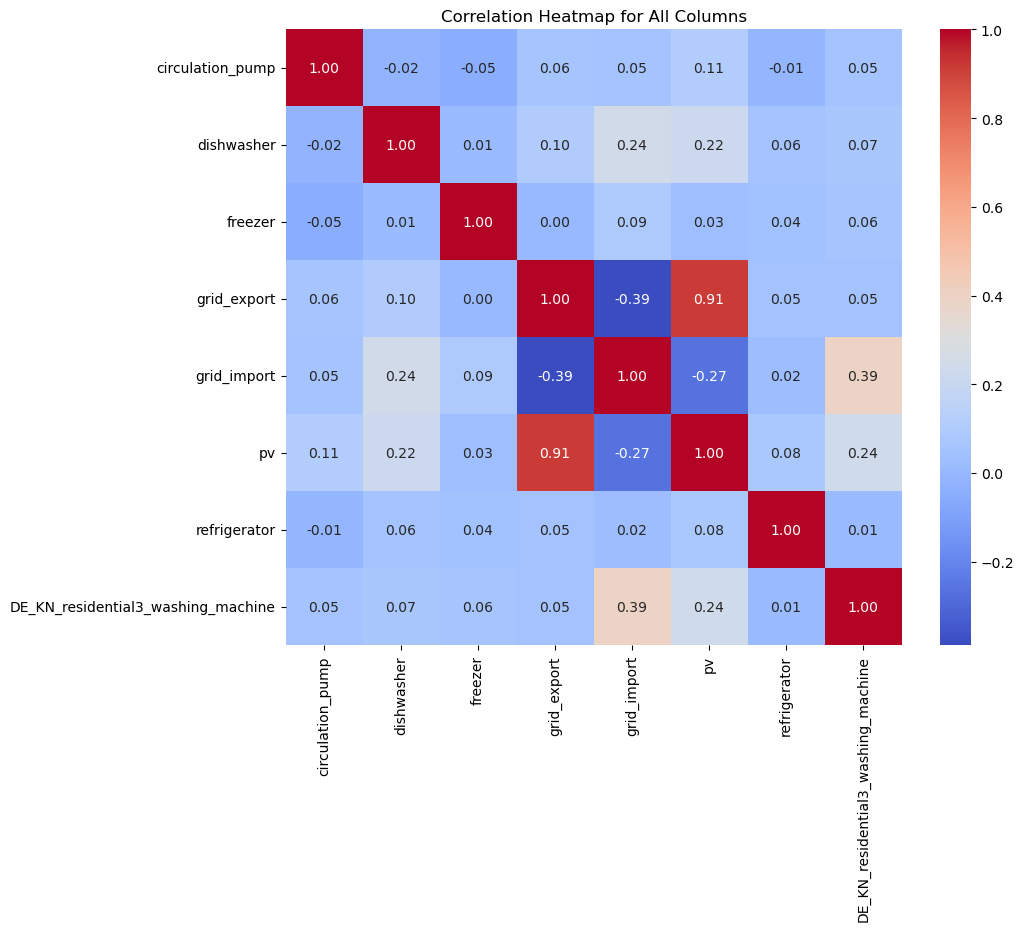

In [27]:
import seaborn as sns

corr_matrix =filtered_data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap for All Columns')
plt.show()
